<a href="https://colab.research.google.com/github/shivangi402/EDA_Hotel-Booking-Analysis/blob/main/Shivangi_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.**

Data analysis helps to develop a clear understanding of the relation between the product available in the market and consumer demand. It helps business to allocate their resources (time, investment) in the correct place. In this EDA project, we tried to explore the data as deeply as possible to get fruitful outcomes. The analysis has simply been done in the following steps.
1. Data Profiling
2. Data Cleaning
3. Exploratory Data Analysis and Visualization

In [ ]:
#importing important libraries & tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#uploading csv file
url='https://drive.google.com/file/d/1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Exploring columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Going through the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#information of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Create a copy of data to make changes
df_new = df.copy()

In [ ]:
#Types of hotels
df_new.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
#Booking Years
df_new["arrival_date_year"].unique()

array([2015, 2016, 2017])

#**Working on missing values(Data Cleaning)**

In [ ]:
#Total null values available in each column
df_new.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Company and Agent has many null values. It might happen customers dont book their hotal via agent and company. So replacing null values with 0. We can also replace children null values with 0 as it may happen no childrens are avaialble in the guest members.

In [ ]:
#Replacing null values with 0
df_new[['company', 'agent','children']] = df_new[['company', 'agent','children']].fillna(value=0)

The "country" has 488 null values. We have no information about the country.  we can replace null values with "other".

In [ ]:
#Replacing country null values with "other"
df_new[['country']] = df_new[['country']].fillna(value='other')

In [ ]:
#Checking all null values cleared
df_new.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<br>**Working on datatype format**</br>
Since, "children", "company" and "agent" has float datatype. We are converting them into an integer.

In [ ]:
#Converting float to integer
df_new[["children", "company", "agent"]] = df_new[["children" ,"company" ,"agent"]].astype("int64")

In [ ]:
#Adding "total stay" column by adding 'stays_in_weekend_nights' and 'stays_in_week_nights'
df_new['total_stay'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']
#Adding "total_guest" by adding 'adults', 'children' and 'babies'
df_new['total_guest'] = df_new['adults'] + df_new['babies']+df_new['children']
df_new

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [ ]:
#Number of city hotel and resort booked
df_new["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

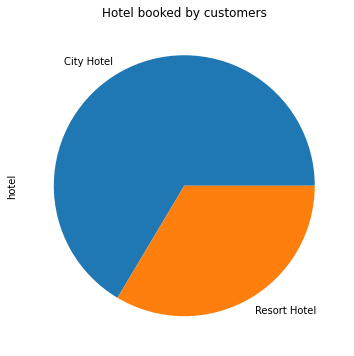

In [ ]:
#Preference of hotel by customers
plt.title("Hotel booked by customers")
df_new["hotel"].value_counts().plot(figsize = (12,6),
                 kind = 'pie')

Conclusion: Customers booked city hotel more over resort hotel

In [ ]:
#Which customer type has mximum booking
df_new['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Text(0.5, 1.0, 'Customer types and their bookings')

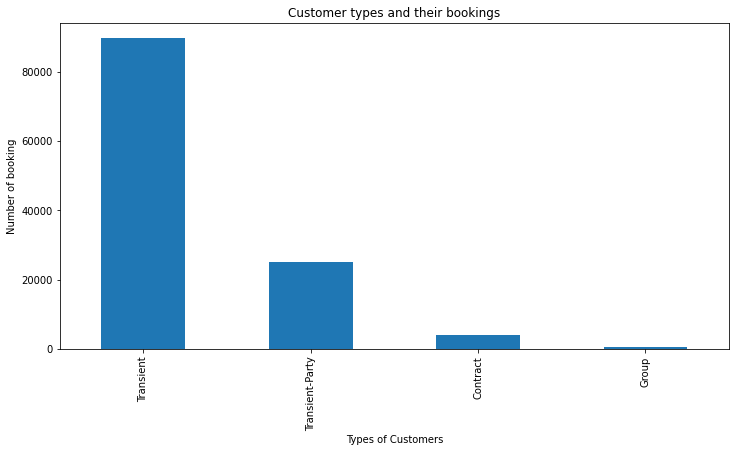

In [ ]:
#Chart for customer type and their number of bookings
df_new["customer_type"].value_counts().plot(figsize = (12,6),
                 kind = 'bar')
plt.ylabel('Number of booking')
plt.xlabel('Types of Customers')
plt.title("Customer types and their bookings")

Conclusion: Transient type has maximum bookings

In [ ]:
#Number of arrivals in each month
df_new["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Month')

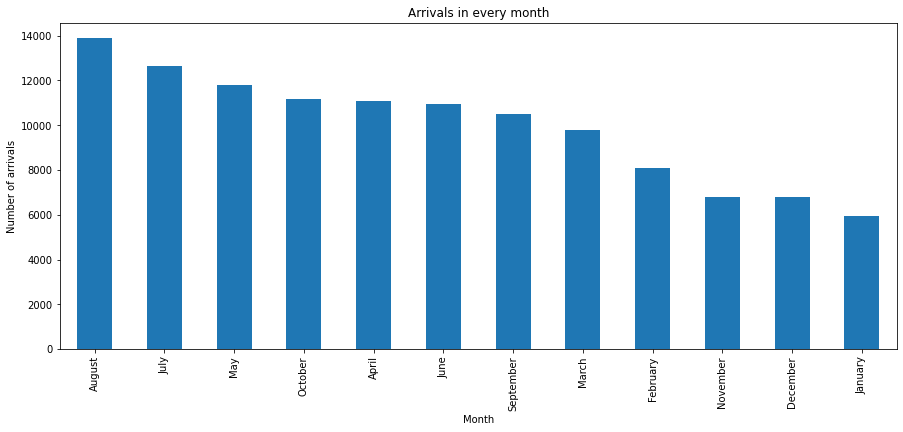

In [ ]:
#Barplot for arrivals in every month
df_new["arrival_date_month"].value_counts().plot(figsize = (15,6),
                 kind = 'bar')
plt.title('Arrivals in every month')
plt.ylabel('Number of arrivals')
plt.xlabel('Month')

Conclusion: August has the maximum arrivals while January has the least arrivals

In [ ]:
#Which agent has taken highest number of bookings
agent_data = pd.DataFrame(df_new['agent'].value_counts().reset_index()).rename(columns = {'index':'Agent','agent':'Total_bookings'})
agent_data = agent_data.drop(index=1)
agent_data = agent_data.nlargest(10, ['Total_bookings'])
agent_data

,Agent,Total_bookings
0,9,31961
2,240,13922
3,1,7191
4,14,3640
5,7,3539
6,6,3290
7,250,2870
8,241,1721
9,28,1666
10,8,1514


Text(0.5, 1.0, 'Agents and their bookings')

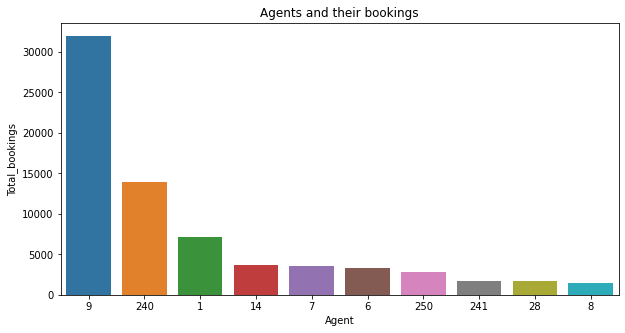

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Agent', y = 'Total_bookings',data = agent_data,order = agent_data.sort_values('Total_bookings', ascending = False).Agent)
plt.title('Agents and their bookings')

Conclusion: Maximum booking has done by agent number(id) 9.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Month')

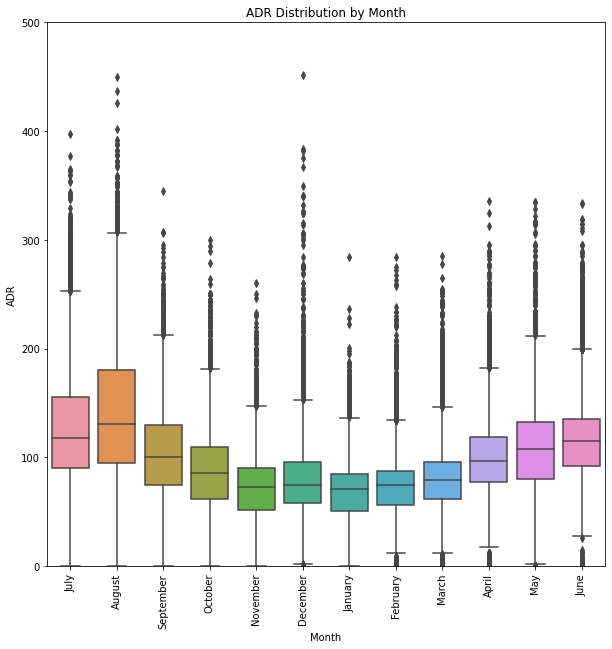

In [ ]:
#ADR distribution by month
plt.subplots( figsize=(10, 10))
sns.boxplot(df_new['arrival_date_month'], y = df_new['adr'])
plt.ylim(0, 500)
plt.xticks(rotation = 90)
plt.title('ADR Distribution by Month')
plt.ylabel('ADR')
plt.xlabel('Month')

<br>ADR is exceptionally highest in August.</br> 
ADR increases from January till August.</br>
ADR keeps on decreasing with the coming of winter season. However, it again rises in December. 

Text(0.5, 0, 'Types of Distribution Channels')

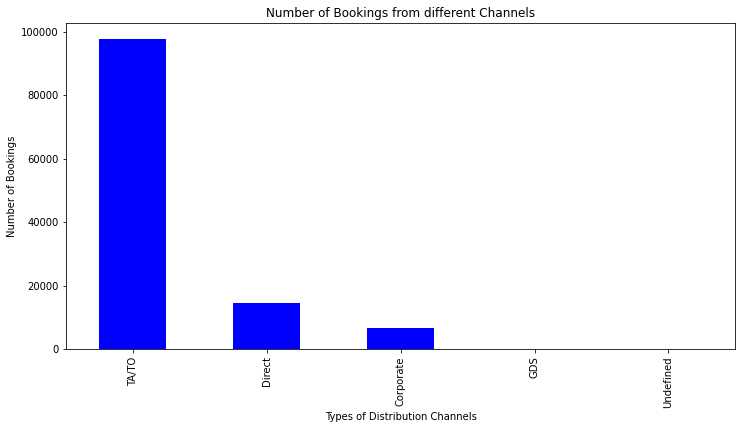

In [ ]:
#Bookings through Distribution Channels
df_new["distribution_channel"].value_counts().plot(figsize = (12,6),
                 kind = 'bar', color ='blue')
plt.title('Number of Bookings from different Channels')
plt.ylabel('Number of Bookings')
plt.xlabel('Types of Distribution Channels')

Conclusion: TA/TO(Travel Agent/Tour Operator) Channel is mostly used for bookings.

Text(0.5, 1.0, 'ADR Vs Total Stay')

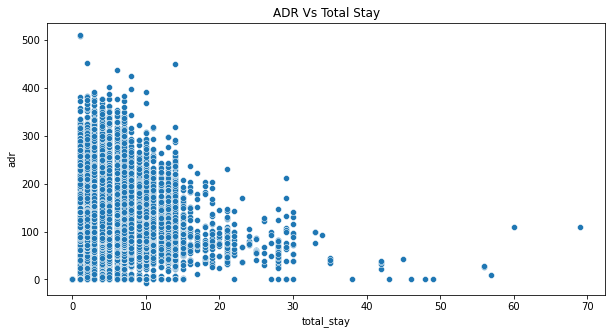

In [ ]:
#Relation between ADR and Total Stay
plt.figure(figsize = (10,5))
df_new.drop(df_new[df_new['adr'] > 5000].index, inplace = True)
sns.scatterplot(x = 'total_stay', y = 'adr',data = df_new)
plt.title('ADR Vs Total Stay')

Conclusion: The scatterplot indicates that as the total stay of customers increases the ADR starts decreasing. It means, better deal can be finalised for longer period of stay.

**Conclusion:**
1. Customers have a high preference for city hotels over resort hotels.
2. There are four types of customers among which the transient type has the maximum bookings.
3. The number of visitors is higher in August month while the lowest is in January. Summer months are mostly preferred by customers.
4. It is found that customers mostly booked tickets from agent number(id) 9 as it might be possible service charge is more affordable.
5. Average daily rate is highest in august. It increases from January to August and then starts decreasing in the winter months.
6. Travel agents/Tour operators are mostly used for bookings as it seems like these channels provide good services to the customers.
7. ADR is lower for a longer stay and higher for shorter stays. Customers can get better deals for a longer stay

**Thank You**